In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
train_data = pd.read_csv('train_kOBLwZA.csv')
test_data = pd.read_csv('test_t02dQwI.csv')

In [3]:
train_data.shape

(8523, 12)

In [4]:
test_data.shape

(5681, 11)

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train_data = train_data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Size'], axis=1)

In [8]:
test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Size'], axis=1)

In [9]:
cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [10]:
#replacing nan values with median
train_data.Item_Weight.fillna(train_data.Item_Weight.median(),inplace=True)
test_data.Item_Weight.fillna(test_data.Item_Weight.median(),inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoders = {}
for col in cat_columns:
    new_le = LabelEncoder()
    train_data[col] = new_le.fit_transform(train_data[col])
    label_encoders[col] = new_le

In [12]:
cat_columns_idx = [train_data.columns.get_loc(col) for col in cat_columns]

In [13]:
ohe = OneHotEncoder(categorical_features=cat_columns_idx, sparse=False, handle_unknown="ignore")
train_np = ohe.fit_transform(train_data)

C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
train_np.shape

(8523, 33)

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for col in cat_columns:
    label_map = {val: label for label, val in enumerate(label_encoders[col].classes_)}    
    test_data[col] = test_data[col].map(label_map)

In [16]:
test_np = ohe.transform(test_data)

In [17]:
test_np.shape

(5681, 32)

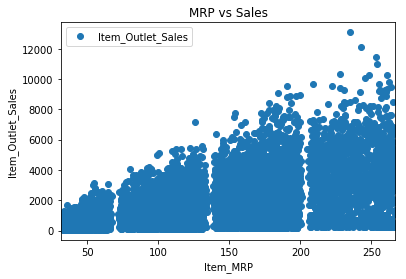

In [18]:
train_data.plot(x = 'Item_MRP', y = 'Item_Outlet_Sales', style = 'o')
plt.title('MRP vs Sales')  
plt.xlabel('Item_MRP')  
plt.ylabel('Item_Outlet_Sales')
plt.show()

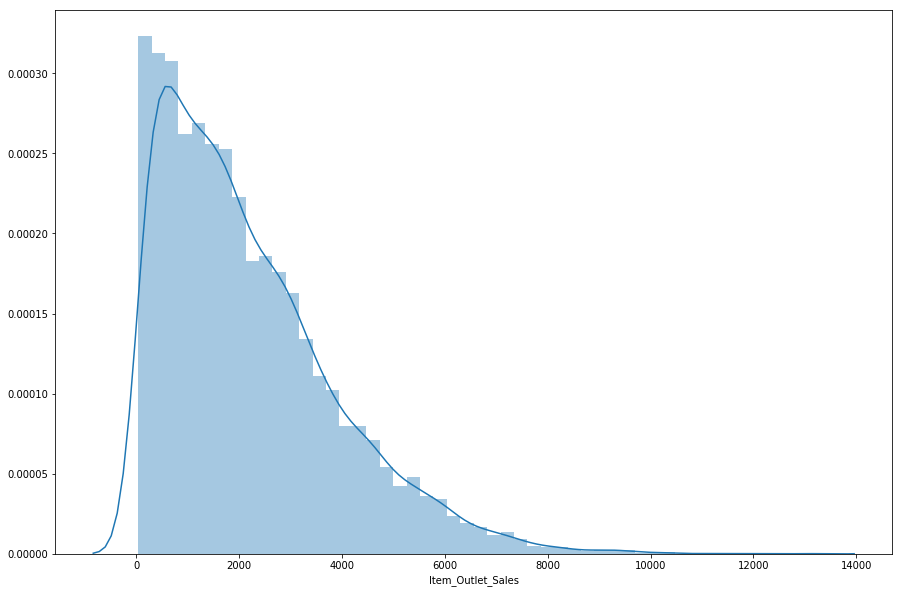

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(train_data['Item_Outlet_Sales'])

In [20]:
X = train_np[:,0:32]
y = train_np[:,-1]

In [21]:
y = y.reshape((8523, 1))

In [22]:
X.shape

(8523, 32)

In [23]:
y.shape

(8523, 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
lr = LinearRegression()
result = lr.fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
rr = Ridge(alpha=5) 
rr.fit(X_train, y_train)

ll = Lasso(alpha = 10)
ll.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)


print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)

print ("\nridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)

print ("\nlasso regression train score low alpha:", Lasso_train_score)
print ("lasso regression test score low alpha:", Lasso_test_score)

linear regression train score: 0.5601345506383834
linear regression test score: 0.5646920985450755

ridge regression train score low alpha: 0.560101985274657
ridge regression test score low alpha: 0.5649325935629881

lasso regression train score low alpha: 0.5575516310966264
lasso regression test score low alpha: 0.5656742721361203


In [54]:
lr.coef_

array([[  -51.78658265,    -9.49875123,    71.3166638 ,    66.16243073,
          -76.19376065,   -32.55034185,   -59.58356799,   -11.21736665,
           20.84866791,  -120.22372224,   -45.69903513,     8.28216284,
           25.91130212,    18.98885092,   -11.52045656,   -40.72825658,
          -19.37563583,   360.59569002,   -18.45060807,   -69.98638817,
           -5.29129474,     1.89024612,   -34.97318887,    33.08294275,
        -1723.5878447 ,   251.19762023,  -135.45770446,  1607.84792893,
           -2.29177216,  -557.95173399,    15.87927678,     3.33381294]])

In [56]:
y_pred = lr.predict(X_test)
y_pred

array([[1318.58487472],
       [ 791.88796717],
       [ 872.28235439],
       ...,
       [3039.59913818],
       [3244.81241432],
       [ 635.29202235]])

No handles with labels found to put in legend.


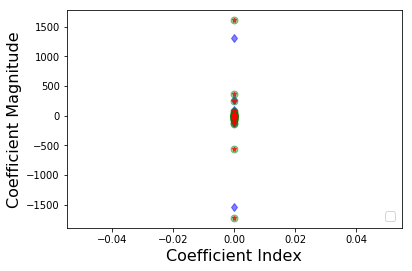

In [33]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.40226e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.49311e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.45839e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.53373e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41858e-

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [44]:
ridge_regressor.best_params_

{'alpha': 10}

In [45]:
ridge_regressor.best_score_

-1319595.671139721

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)


C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3030199753.9326296, tolerance: 1368583.9560218256
  positive)
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2983516885.4215, tolerance: 1357508.6889004887
  positive)
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2928700821.938437, tolerance: 1345409.7856151138
  positive)
C:\Users\shwet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [49]:
lasso_regressor.best_params_

{'alpha': 5}

In [50]:
lasso_regressor.best_score_

-1312812.8830064165